In [1]:
from pathlib import Path

import importlib
import pkgutil
import torch

import asynctorch_experiments.buildtools.better_paths
import asynctorch_experiments.buildtools.experiment
import asynctorch_experiments.n_mnist.experiment_dicts
%load_ext autoreload

/home/jortg/Documents/uni/master/thesis/code/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


device: cuda
/home/jortg/Documents/uni/master/thesis/code/asynctorch_experiments/src/asynctorch_experiments
Starting Experiment (mubrain_compare_clamp_low_to_0)
(cuda) Performing a pseudo run (F 128)
attempting to init MubrainIFState
Registring spike monitor
Registring weight monitor


 11%|█         | 100/938 [00:19<02:39,  5.26it/s]


plotting monitors...


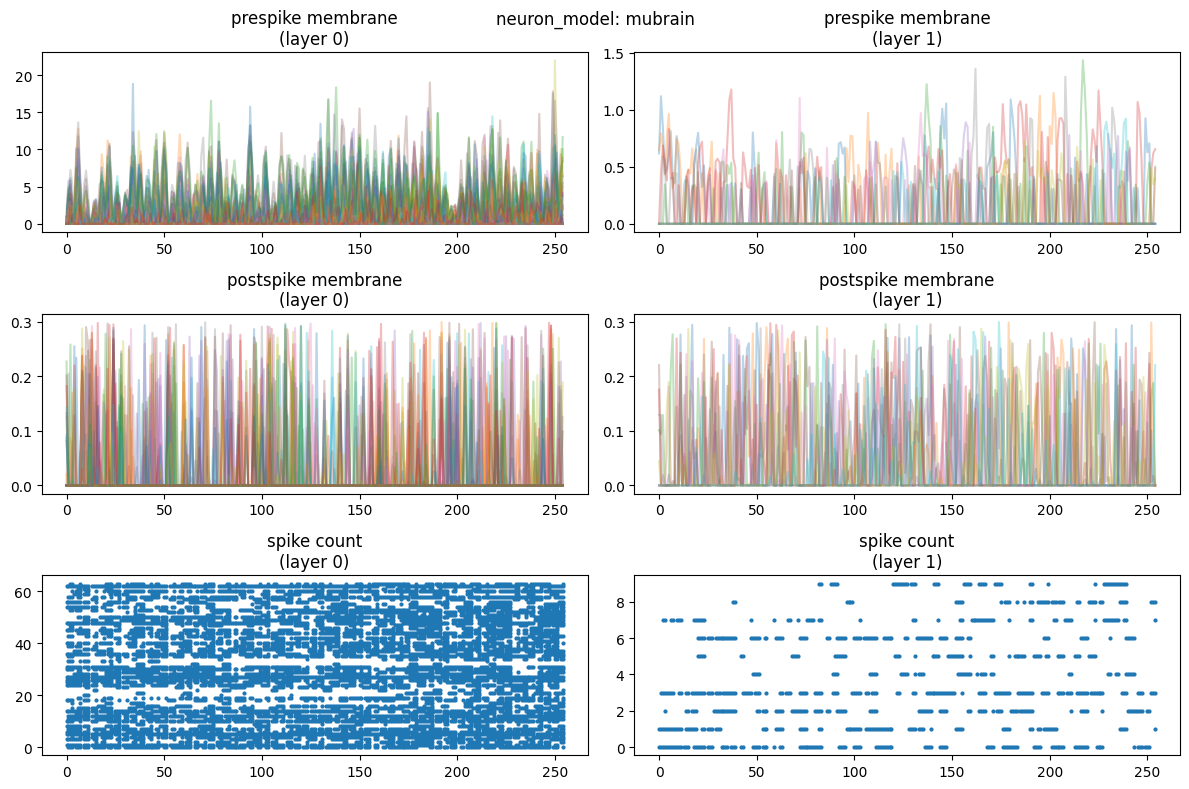

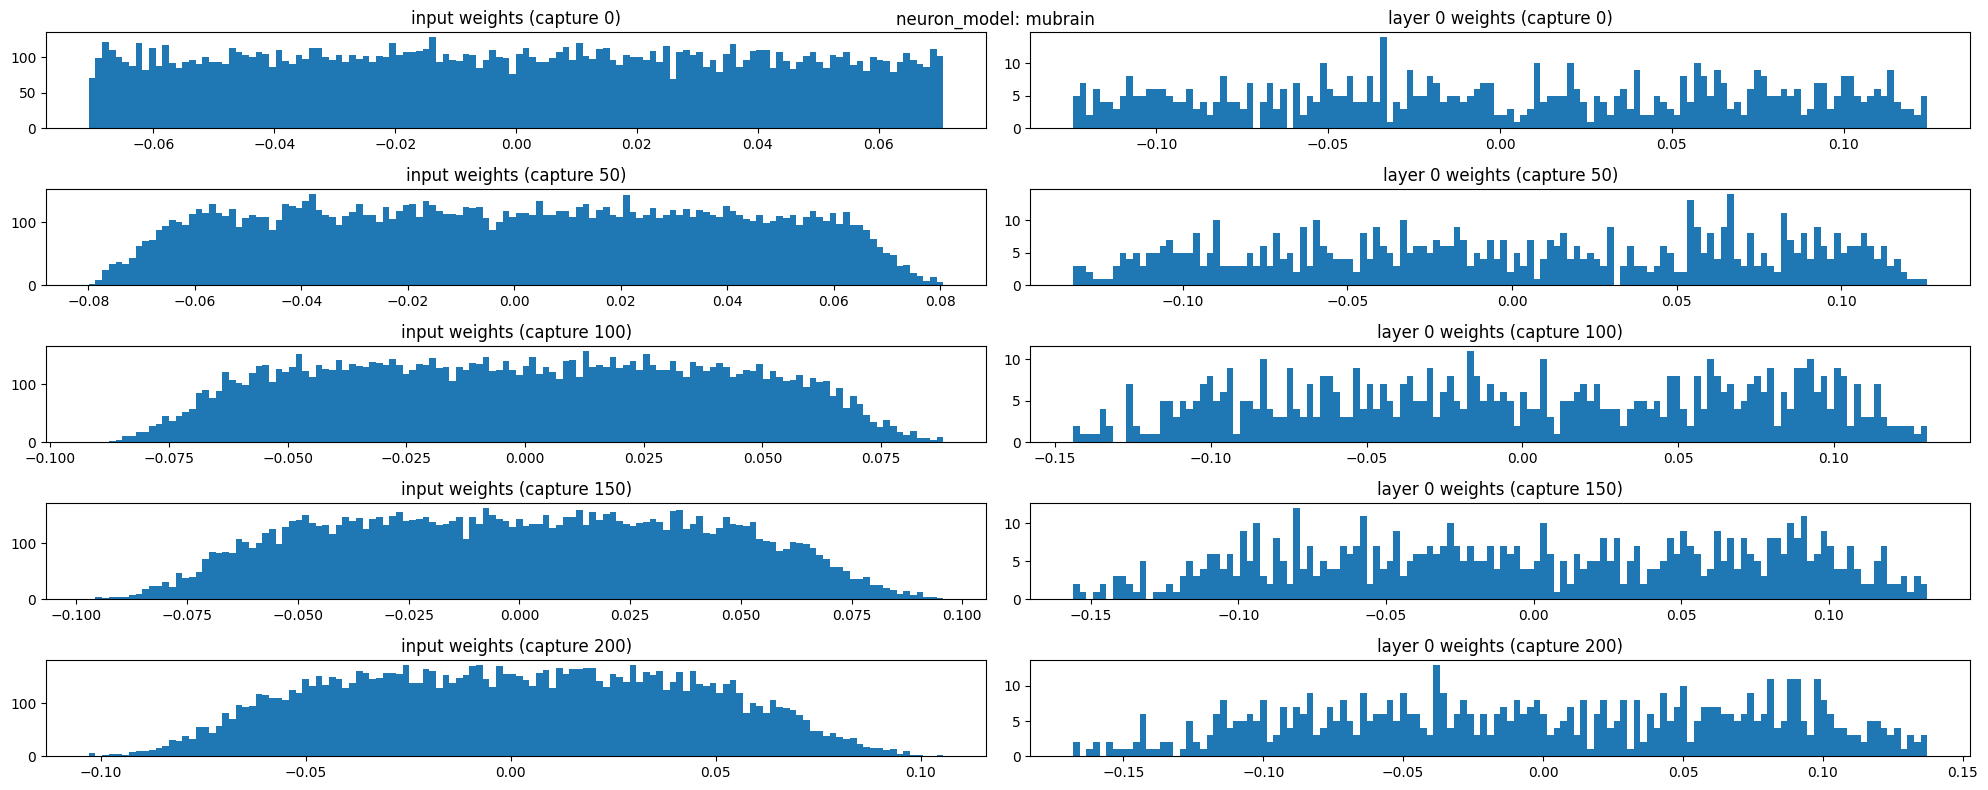

(cuda) Performing a pseudo run (F 128)
Registring spike monitor
Registring weight monitor


 11%|█         | 100/938 [00:17<02:27,  5.68it/s]


plotting monitors...


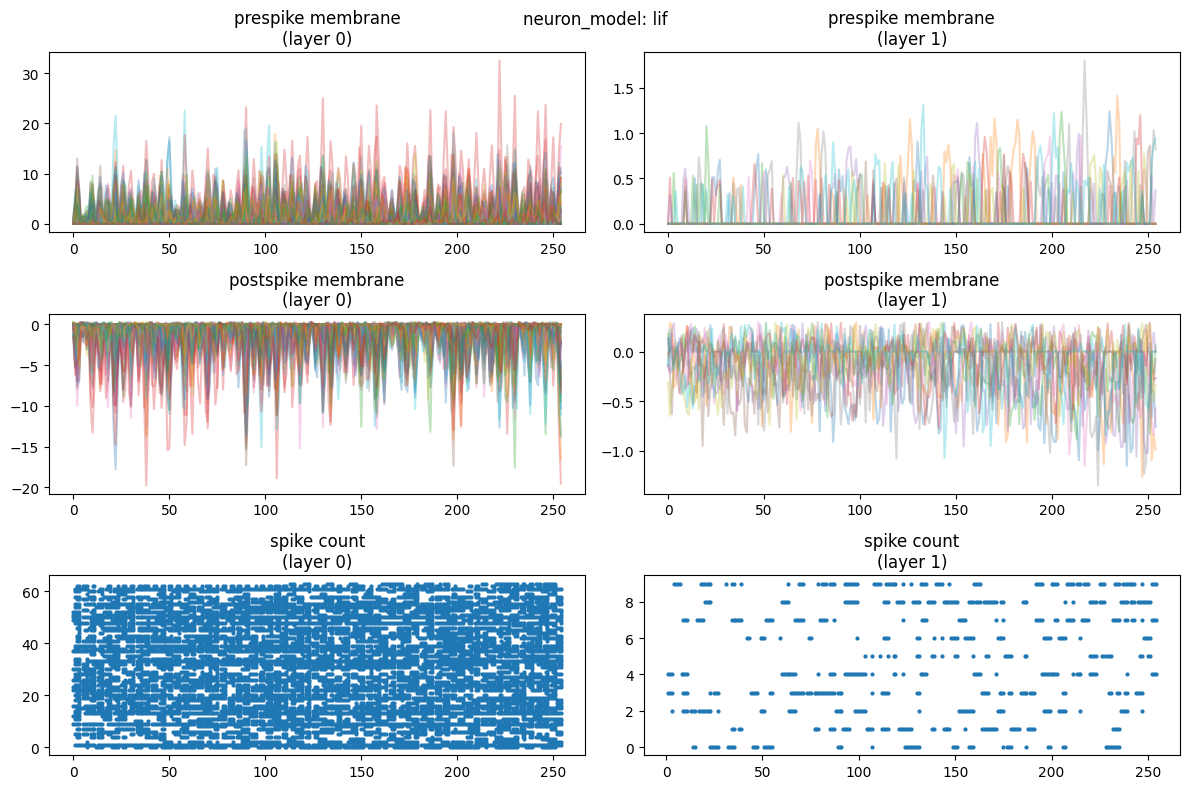

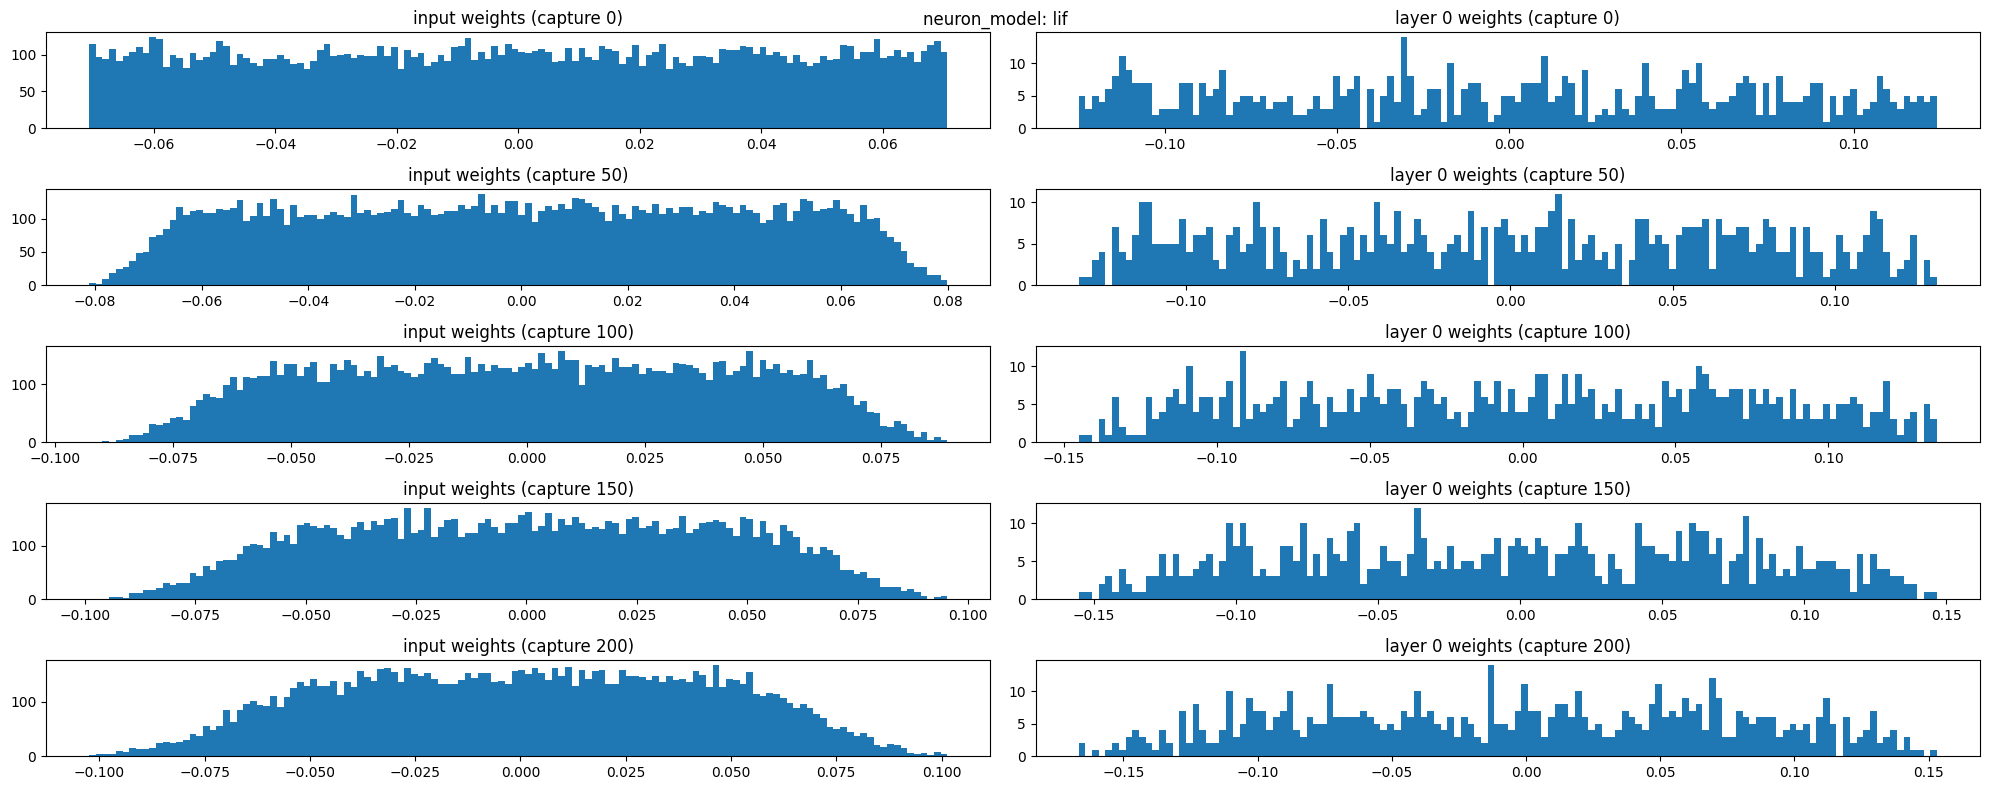

Starting Experiment (mubrain_compare_clamp_low_to_0)
-> [unit 1/2] - (F_train: 1/1, param: 1/2, trial: 1/1)
(cuda) Training (F_train 128; epoch 1)
attempting to init MubrainIFState


100%|██████████| 938/938 [02:10<00:00,  7.21it/s]


(cuda) Testing F_test 128 (F_train 128; epoch 1)
attempting to init MubrainIFState


100%|██████████| 157/157 [00:16<00:00,  9.58it/s]


	acc: 0.899
(ep 1)    128: 0.899 (1/1)
-
-> [unit 2/2] - (F_train: 1/1, param: 2/2, trial: 1/1)
(cuda) Training (F_train 128; epoch 1)


100%|██████████| 938/938 [00:48<00:00, 19.37it/s]


(cuda) Testing F_test 128 (F_train 128; epoch 1)


100%|██████████| 157/157 [00:06<00:00, 25.01it/s]


	acc: 0.910
(ep 1)    128: 0.910 (1/1)
-


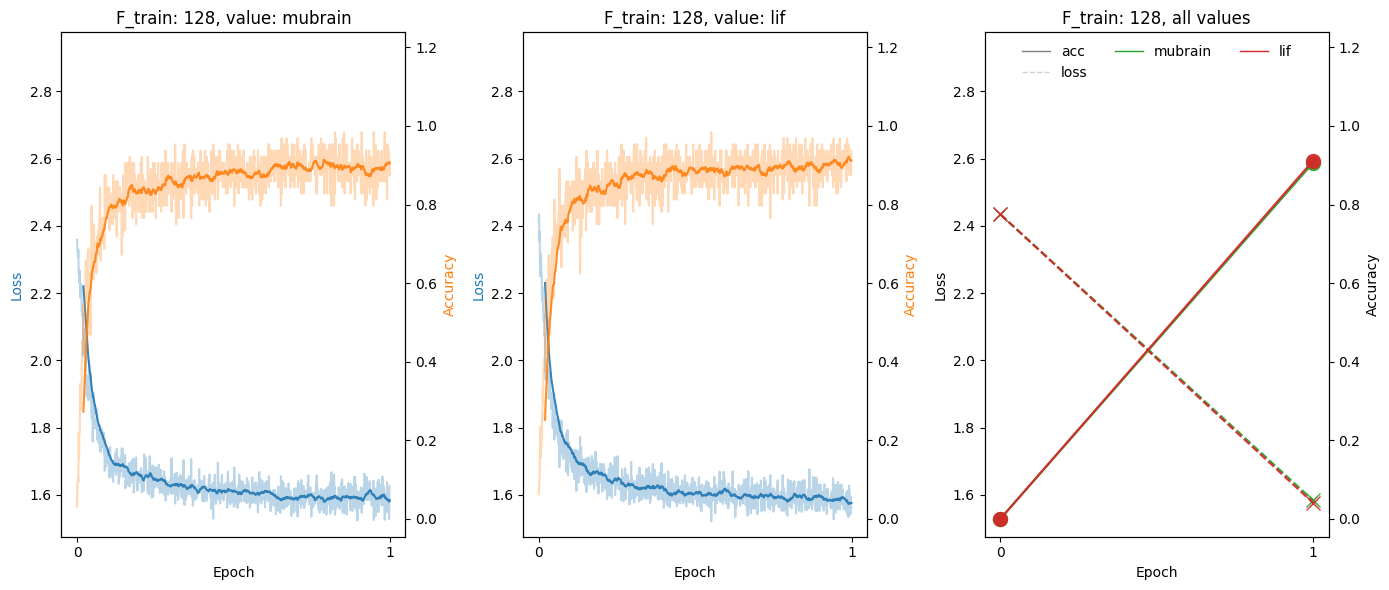

Starting Experiment (mubrain_compare_clamp_low_to_0)
(cuda) Training (F_train 128; epoch 1)
attempting to init MubrainIFState


100%|██████████| 938/938 [00:44<00:00, 21.08it/s]


(cuda) Performing a pseudo run (F 128)
attempting to init MubrainIFState
Registring spike monitor
Registring weight monitor


 64%|██████▎   | 100/157 [00:04<00:02, 20.66it/s]


	acc: 0.932, loss: 1.569
plotting monitors...


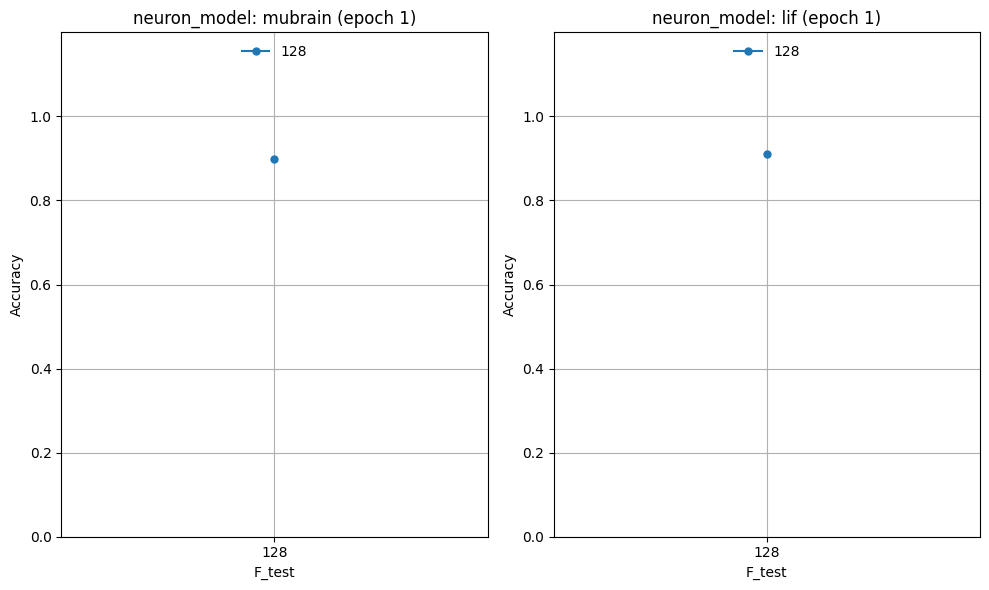

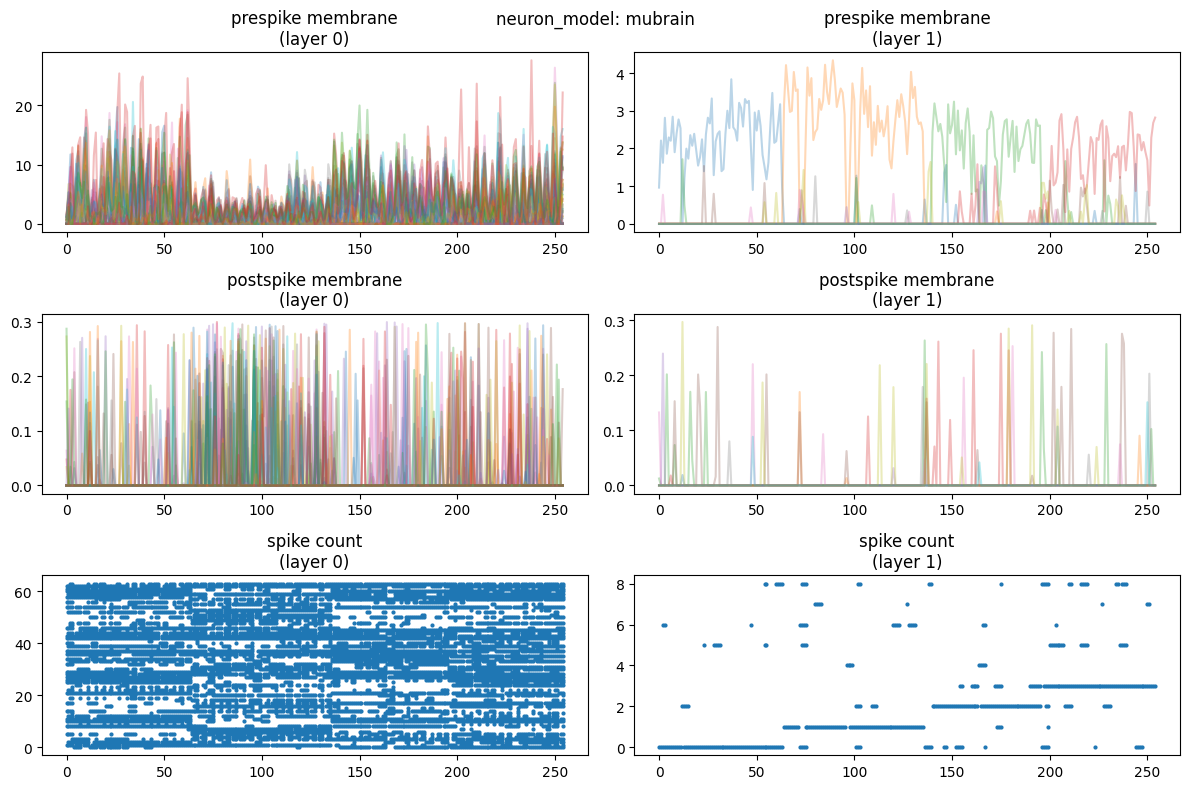

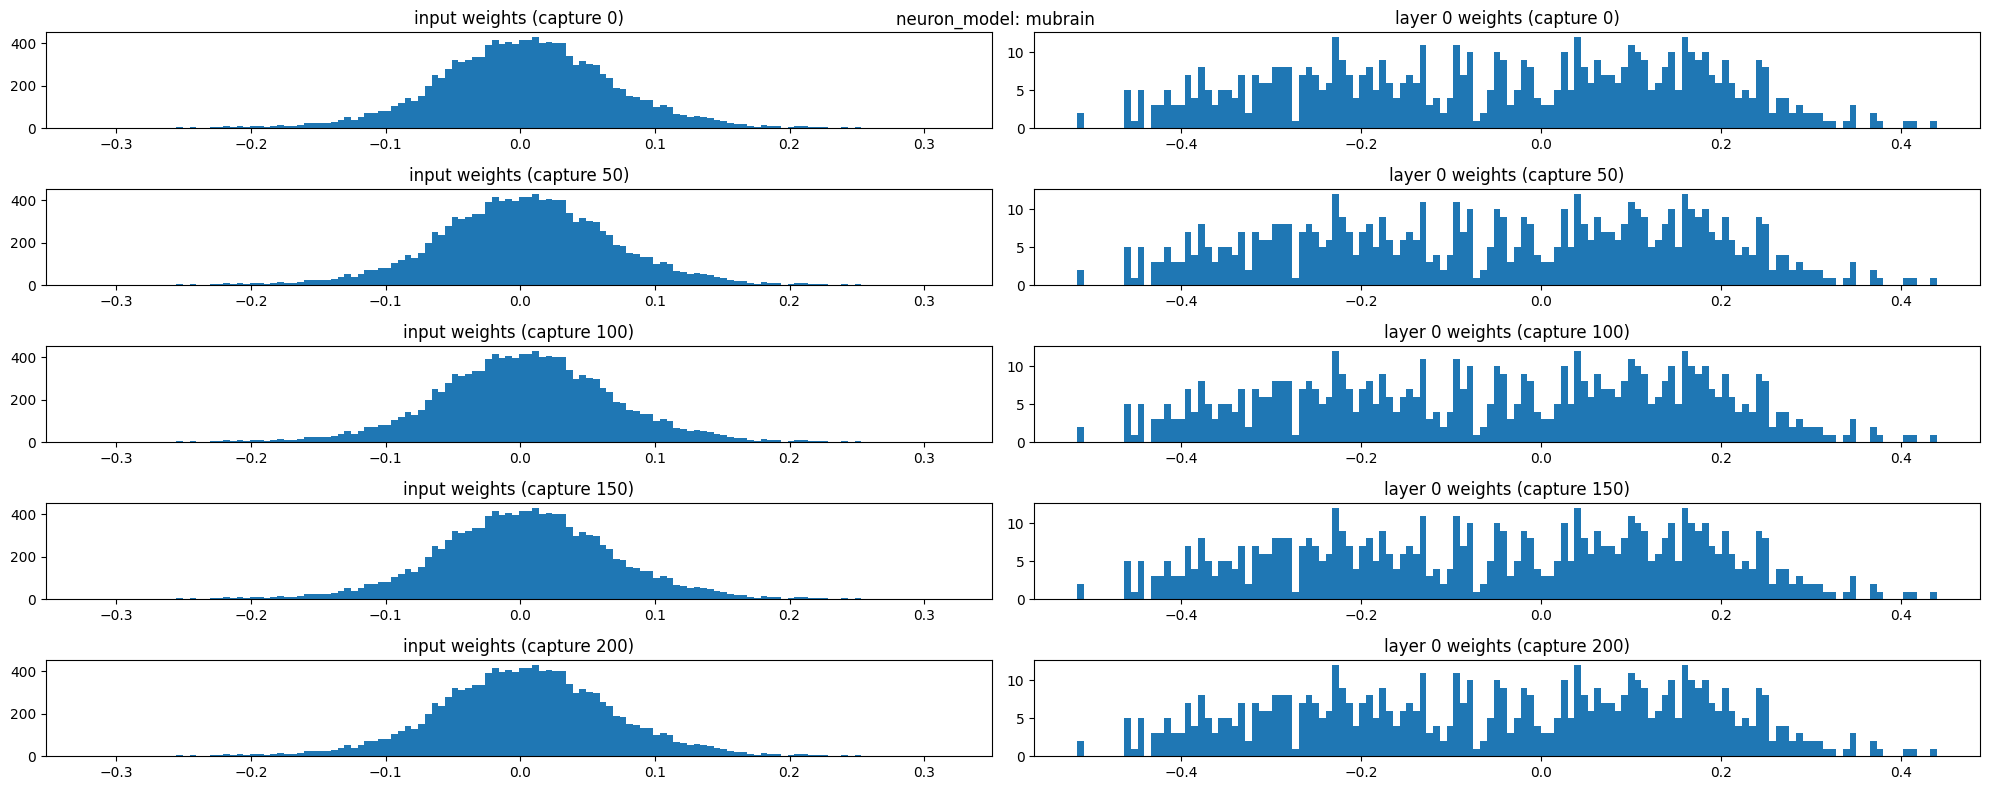

(cuda) Training (F_train 128; epoch 1)


100%|██████████| 938/938 [00:51<00:00, 18.28it/s]


(cuda) Performing a pseudo run (F 128)
Registring spike monitor
Registring weight monitor


 64%|██████▎   | 100/157 [00:03<00:02, 25.93it/s]


	acc: 0.932, loss: 1.560
plotting monitors...


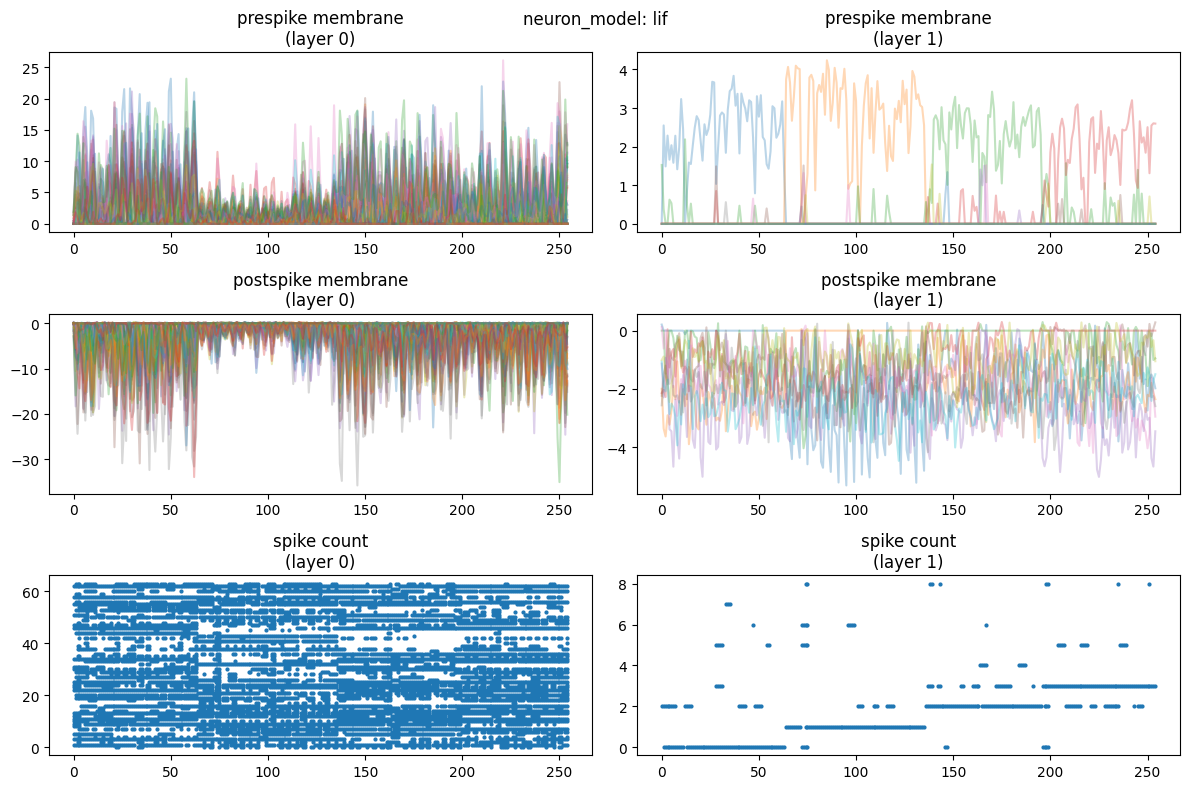

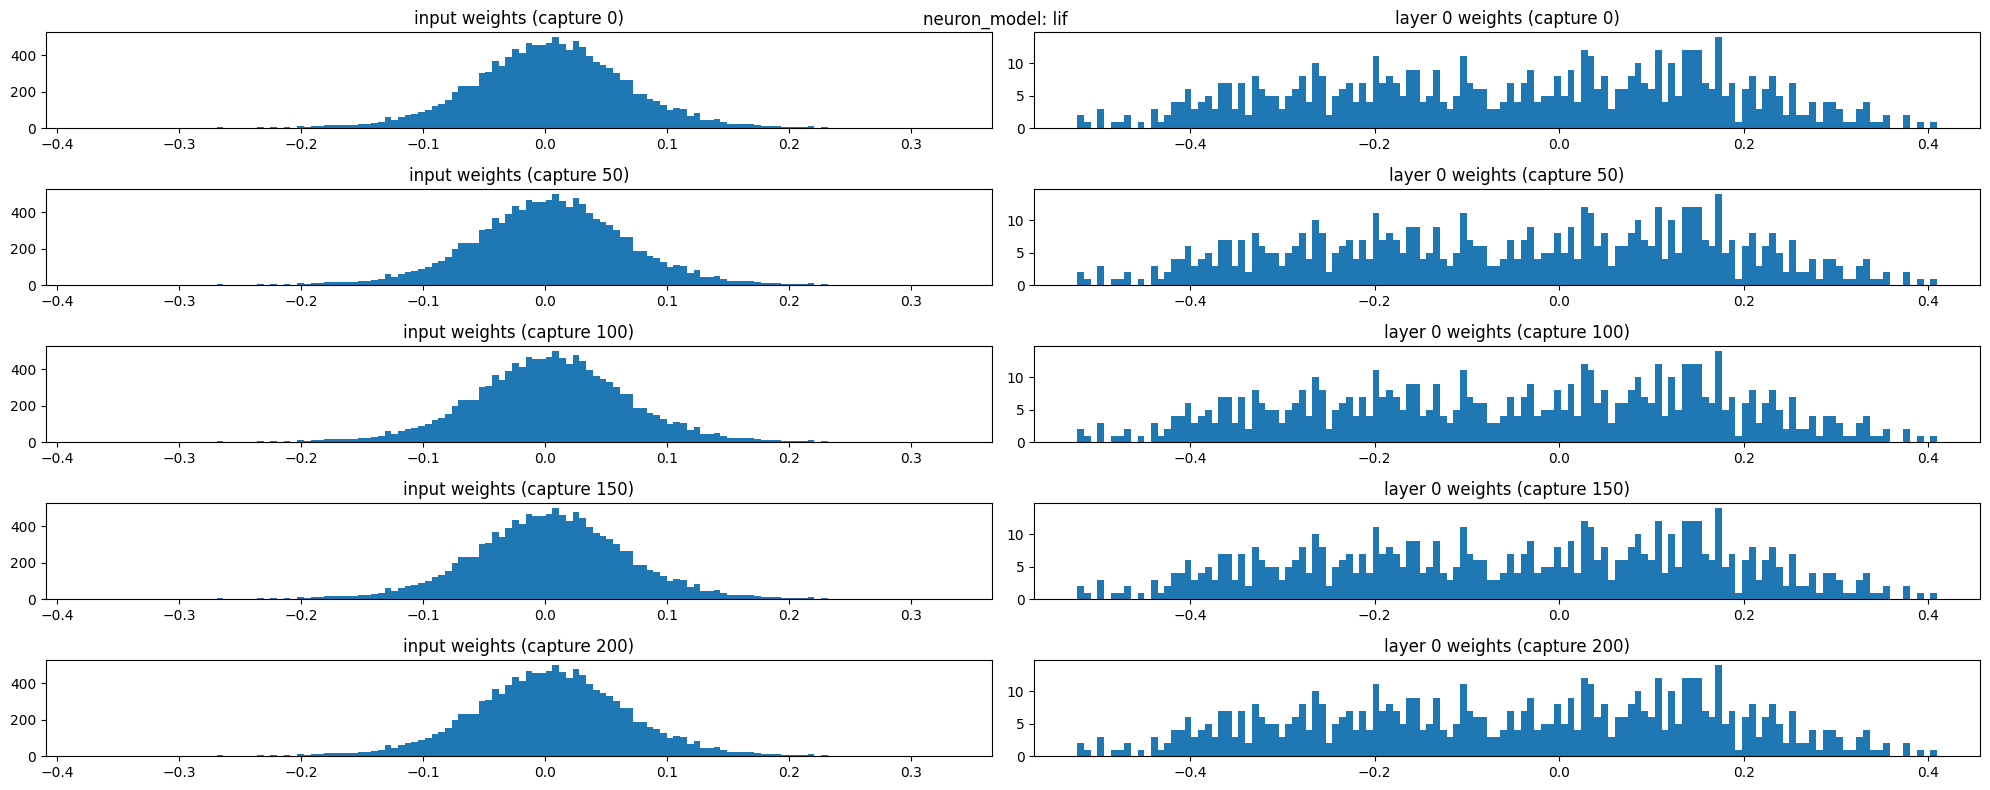

In [2]:

%autoreload 2


MyPath = asynctorch_experiments.buildtools.better_paths.MyPath
Experiment = asynctorch_experiments.buildtools.experiment.Experiment
EXPERIMENTS = asynctorch_experiments.n_mnist.experiment_dicts.EXPERIMENTS
from asynctorch_experiments.evaluation.monitor import Monitor, TestMonitor, SpikeMonitor, WeightMonitor,  MembraneMonitor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'device: {device}')

project_path = MyPath(Path().resolve()).change_dir('..')
print(project_path)



purge_old=False
verbose=False




monitors = [
    SpikeMonitor,
    WeightMonitor
]


########## Only Change These ###########
exp_name = 'mubrain_compare_clamp_low_to_0'

do_pseudo_runs=True

pseudoruns=100
if do_pseudo_runs:
    purge_old=True
########################################

if do_pseudo_runs:
    # train_pseudo_run on untrained model
    Experiment.run_experiment(
        experiments=EXPERIMENTS,
        exp_name=exp_name,
        project_path=project_path,
        purge_old=purge_old,
        override_verbose=verbose,
        override_device=device,
        monitors=monitors,
        train_before_pseudo=False,
        pseudorun=pseudoruns,
        pseudo_mode='train',
        pseudo_string='before'
    )
# perform regular experiment
Experiment.run_experiment(
    experiments=EXPERIMENTS,
    exp_name=exp_name,
    project_path=project_path,
    purge_old=purge_old,
    override_verbose=verbose,
    override_device=device,
    monitors=monitors,
    train_before_pseudo=False,
    pseudorun=False,
    pseudo_mode='train'
)
if do_pseudo_runs:
    Experiment.run_experiment(
        experiments=EXPERIMENTS,
        exp_name=exp_name,
        project_path=project_path,
        purge_old=purge_old,
        override_verbose=verbose,
        override_device=device,
        monitors=monitors,
        train_before_pseudo=True,
        pseudorun=pseudoruns,
        pseudo_mode='test',
        pseudo_string='after'
    )

In [4]:
import numpy as np
weights = np.random.normal(0, 1)

n_bits = 4
n_vals = 2**n_bits-1
zero_point = 0
min_weight = -n_vals//2+1
max_weight = n_vals//2
print(n_vals)

print(min_weight)
print(max_weight)

15
-7
7
